# Creating final data for crop and fertilizer recommendation system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertilizer_data_path = 'Fertilizer Prediction.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
#

In [5]:
merge_fert.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
merge_fert['Crop'].unique()

KeyError: 'Crop'

In [14]:
plt.plot(merge_fert["N"])

KeyError: 'N'

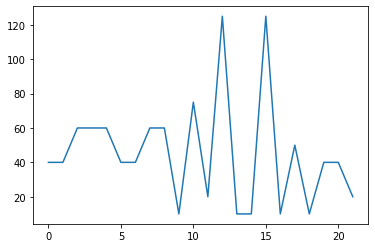

In [8]:
plt.plot(merge_fert["P"])

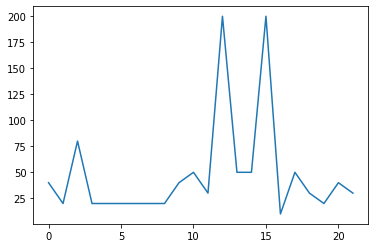

In [9]:
plt.plot(merge_fert["K"])

<AxesSubplot:>

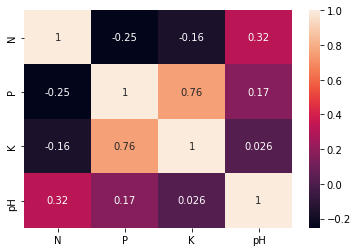

In [10]:
sns.heatmap(merge_fert.corr(),annot=True)

In [11]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [12]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [13]:
temp

,N,P,K
0,90,42,43
1,85,58,41
2,60,55,44
3,74,35,40
4,78,42,42
...,...,...,...
2195,107,34,32
2196,99,15,27
2197,118,33,30
2198,117,32,34


In [14]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [15]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,90,42,43
1,1,21.770462,80.319644,7.038096,226.655537,rice,85,58,41
2,2,23.004459,82.320763,7.840207,263.964248,rice,60,55,44
3,3,26.491096,80.158363,6.980401,242.864034,rice,74,35,40
4,4,20.130175,81.604873,7.628473,262.717340,rice,78,42,42
...,...,...,...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee,107,34,32
2196,896,27.417112,56.636362,6.086922,127.924610,coffee,99,15,27
2197,897,24.131797,67.225123,6.362608,173.322839,coffee,118,33,30
2198,898,26.272418,52.127394,6.758793,127.175293,coffee,117,32,34


In [16]:
del merge_crop['Unnamed: 0']

In [17]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,90,42,43
1,21.770462,80.319644,7.038096,226.655537,rice,85,58,41
2,23.004459,82.320763,7.840207,263.964248,rice,60,55,44
3,26.491096,80.158363,6.980401,242.864034,rice,74,35,40
4,20.130175,81.604873,7.628473,262.717340,rice,78,42,42
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,107,34,32
2196,27.417112,56.636362,6.086922,127.924610,coffee,99,15,27
2197,24.131797,67.225123,6.362608,173.322839,coffee,118,33,30
2198,26.272418,52.127394,6.758793,127.175293,coffee,117,32,34


In [18]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [19]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [20]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [21]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [22]:
df.shape

(2200, 8)